In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

# Set seaborn style for all plots
#sns.set_theme(style="whitegrid")

# Load the data
train_data = pd.read_csv('input_training.csv', index_col=0)
train_data_y = pd.read_csv('output_training_gmEd6Zt.csv', index_col=0)
test_data = pd.read_csv('input_test.csv', index_col=0)

# Print the shape of the datasets
print(f"Train: Input Features Shape: {train_data.shape}")
print(f"Train: Output Features Shape: {train_data_y.shape}")
print(f"Test: Input Features Shape: {test_data.shape}")

Train: Input Features Shape: (843299, 55)
Train: Output Features Shape: (843299, 1)
Test: Input Features Shape: (885799, 55)


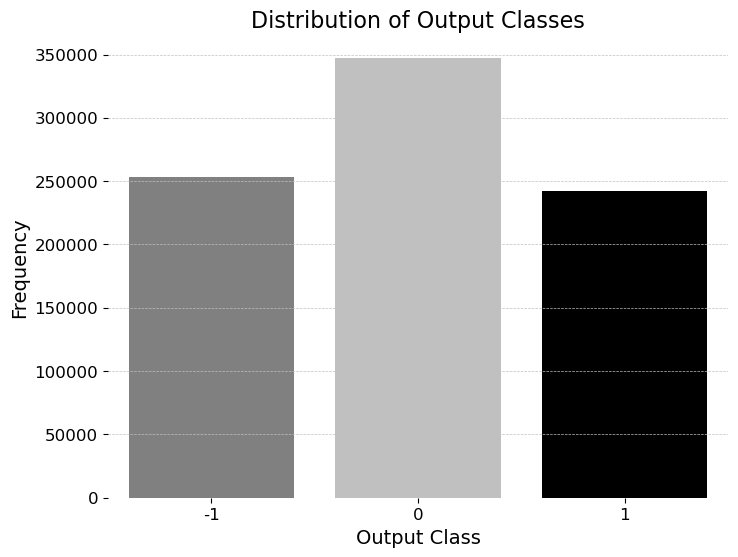

In [27]:
# Visualizing the class distribution with a modern design
plt.figure(figsize=(8, 6))
sns.countplot(x='reod', data=train_data_y, palette=['gray', 'silver', 'black'])
plt.title('Distribution of Output Classes', fontsize=16, fontweight='light')
plt.xlabel('Output Class', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='silver')
plt.box(False)
plt.show()


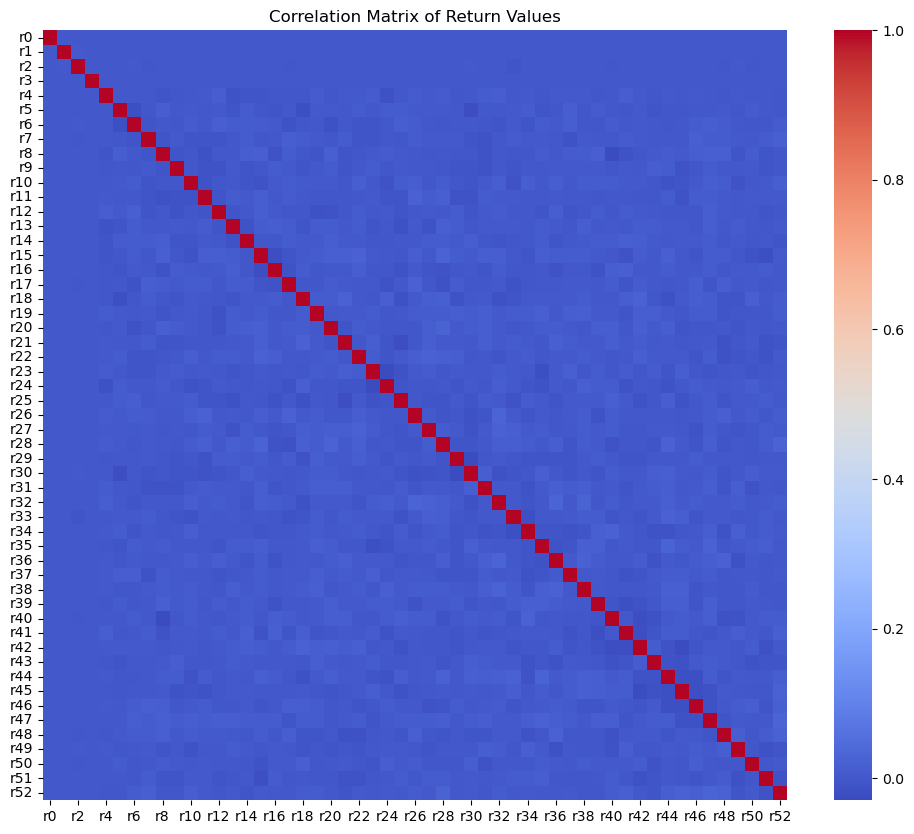

In [3]:
# Correlation matrix of the return values, excluding 'day' and 'equity' columns
plt.figure(figsize=(12,10))
sns.heatmap(train_data.iloc[:, 2:].corr(), annot=False, cmap='coolwarm', linewidths=0)
plt.title('Correlation Matrix of Return Values')
plt.show()

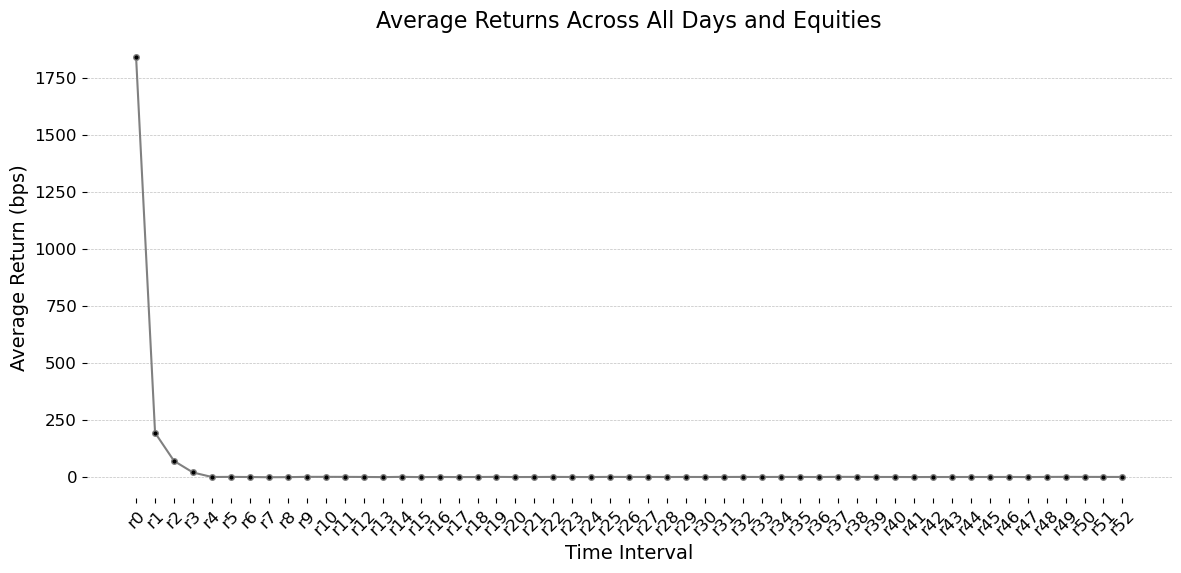

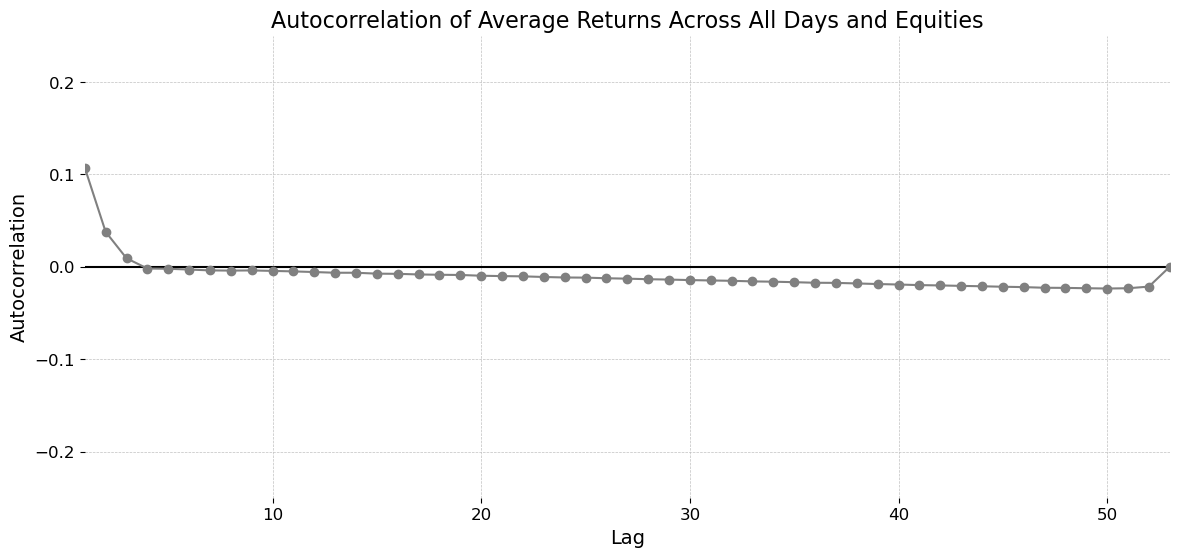

In [31]:
# Calculate the mean return for each time interval across all equities and days
average_returns = train_data.iloc[:, 2:55].mean()

# Plot the average returns with a modern and sleek design
plt.figure(figsize=(14, 6))
plt.plot(average_returns.index, average_returns, marker='o', linestyle='-', color='gray', markersize=4, markerfacecolor='black')
plt.title('Average Returns Across All Days and Equities', fontsize=16, fontweight='light')
plt.xlabel('Time Interval', fontsize=14)
plt.ylabel('Average Return (bps)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='silver')
plt.box(False)
plt.show()

# Plotting autocorrelation of the average returns with a refined design
plt.figure(figsize=(14, 6))
autocorrelation_plot(average_returns, marker='o', linestyle='-', color='gray')
plt.ylim(-0.25, 0.25)
plt.title('Autocorrelation of Average Returns Across All Days and Equities', fontsize=16, fontweight='light')
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', linewidth=0.5, color='silver')
plt.box(False)
# Segment data based on the target variable
down_market = merged_data[merged_data['reod'] == -1]
stable_market = merged_data[merged_data['reod'] == 0]
up_market = merged_data[merged_data['reod'] == 1]

# Calculate average returns for each segment
average_returns_down = down_market.iloc[:, 2:55].mean()
average_returns_stable = stable_market.iloc[:, 2:55].mean()
average_returns_up = up_market.iloc[:, 2:55].mean()

plt.show()

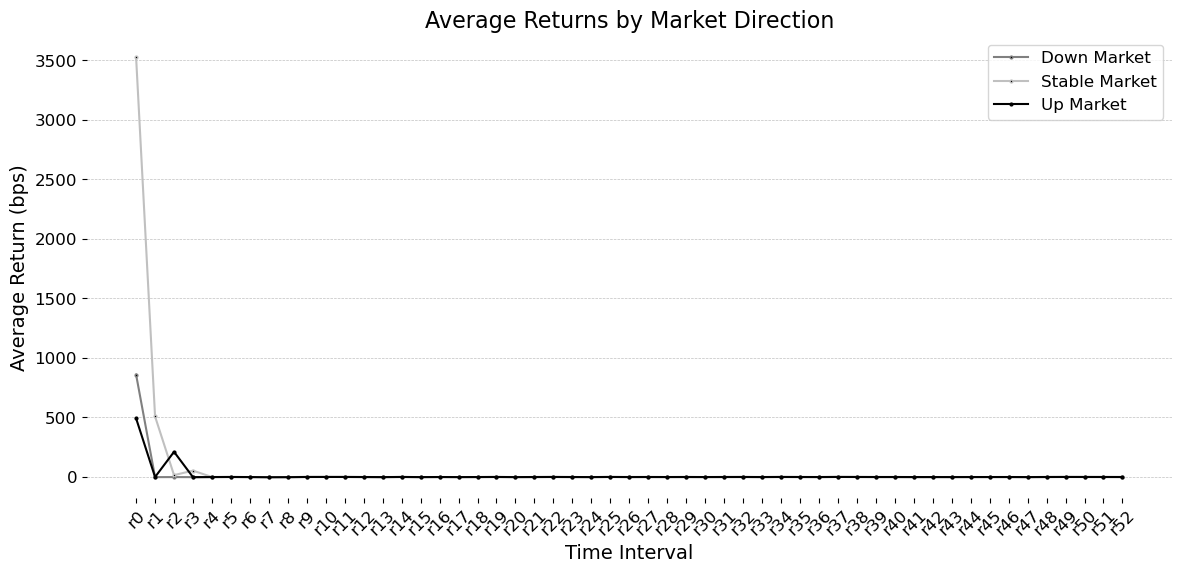

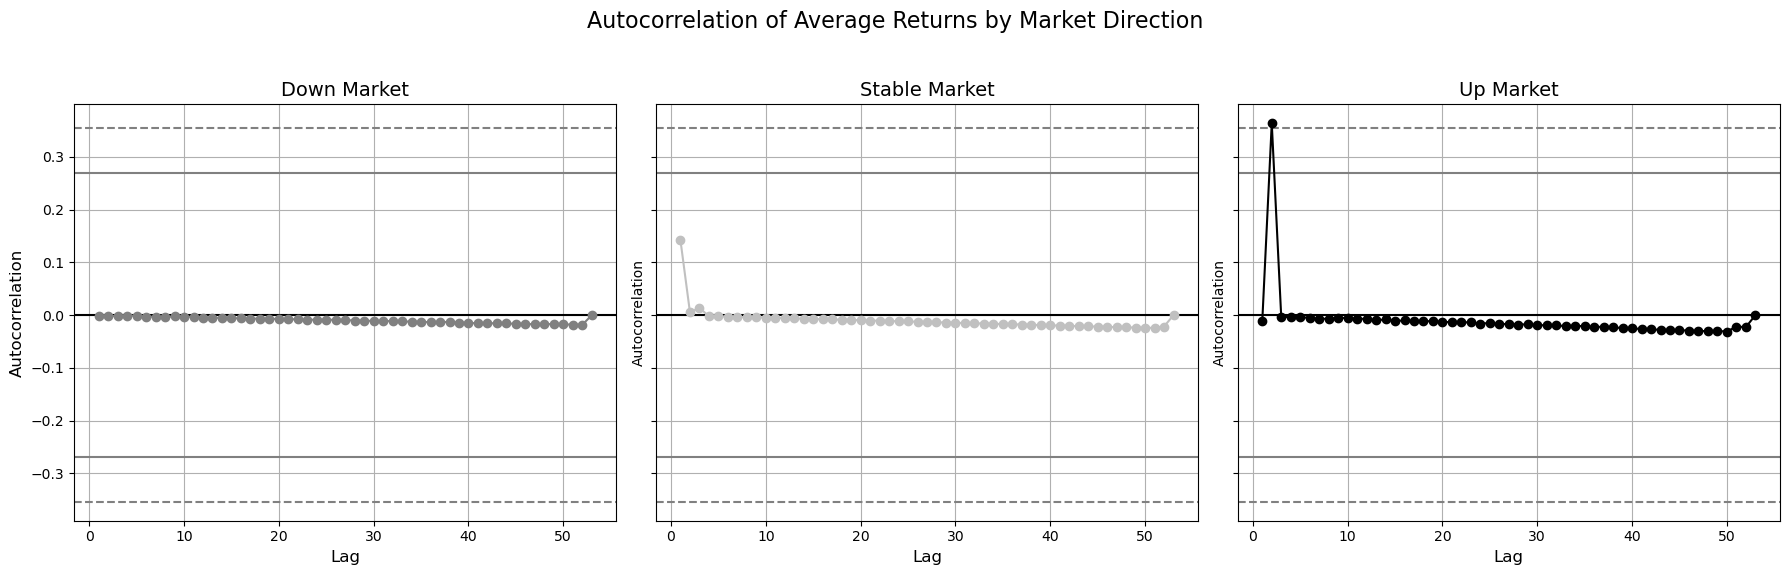

In [32]:
# Segment data based on the target variable
down_market = merged_data[merged_data['reod'] == -1]
stable_market = merged_data[merged_data['reod'] == 0]
up_market = merged_data[merged_data['reod'] == 1]

# Calculate average returns for each segment
average_returns_down = down_market.iloc[:, 2:55].mean()
average_returns_stable = stable_market.iloc[:, 2:55].mean()
average_returns_up = up_market.iloc[:, 2:55].mean()


# Plot the average returns for each market condition with a modern design
plt.figure(figsize=(14, 6))
plt.plot(average_returns_down.index, average_returns_down, marker='o', linestyle='-', color='gray', markersize=2, label='Down Market', markerfacecolor='black')
plt.plot(average_returns_stable.index, average_returns_stable, marker='o', linestyle='-', color='silver', markersize=2, label='Stable Market', markerfacecolor='black')
plt.plot(average_returns_up.index, average_returns_up, marker='o', linestyle='-', color='black', markersize=2, label='Up Market', markerfacecolor='black')
plt.title('Average Returns by Market Direction', fontsize=16, fontweight='light')
plt.xlabel('Time Interval', fontsize=14)
plt.ylabel('Average Return (bps)', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='silver')
plt.box(False)
plt.show()


# Setting up subplots for autocorrelation plots by market direction
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
# Down Market Autocorrelation
autocorrelation_plot(average_returns_down, ax=axs[0], marker='o', linestyle='-', color='gray')
axs[0].set_title('Down Market', fontsize=14, fontweight='light')
axs[0].set_xlabel('Lag', fontsize=12)
axs[0].set_ylabel('Autocorrelation', fontsize=12)
# Stable Market Autocorrelation
autocorrelation_plot(average_returns_stable, ax=axs[1], marker='o', linestyle='-', color='silver')
axs[1].set_title('Stable Market', fontsize=14, fontweight='light')
axs[1].set_xlabel('Lag', fontsize=12)
# Up Market Autocorrelation
autocorrelation_plot(average_returns_up, ax=axs[2], marker='o', linestyle='-', color='black')
axs[2].set_title('Up Market', fontsize=14, fontweight='light')
axs[2].set_xlabel('Lag', fontsize=12)
plt.suptitle('Autocorrelation of Average Returns by Market Direction', fontsize=16, fontweight='light')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

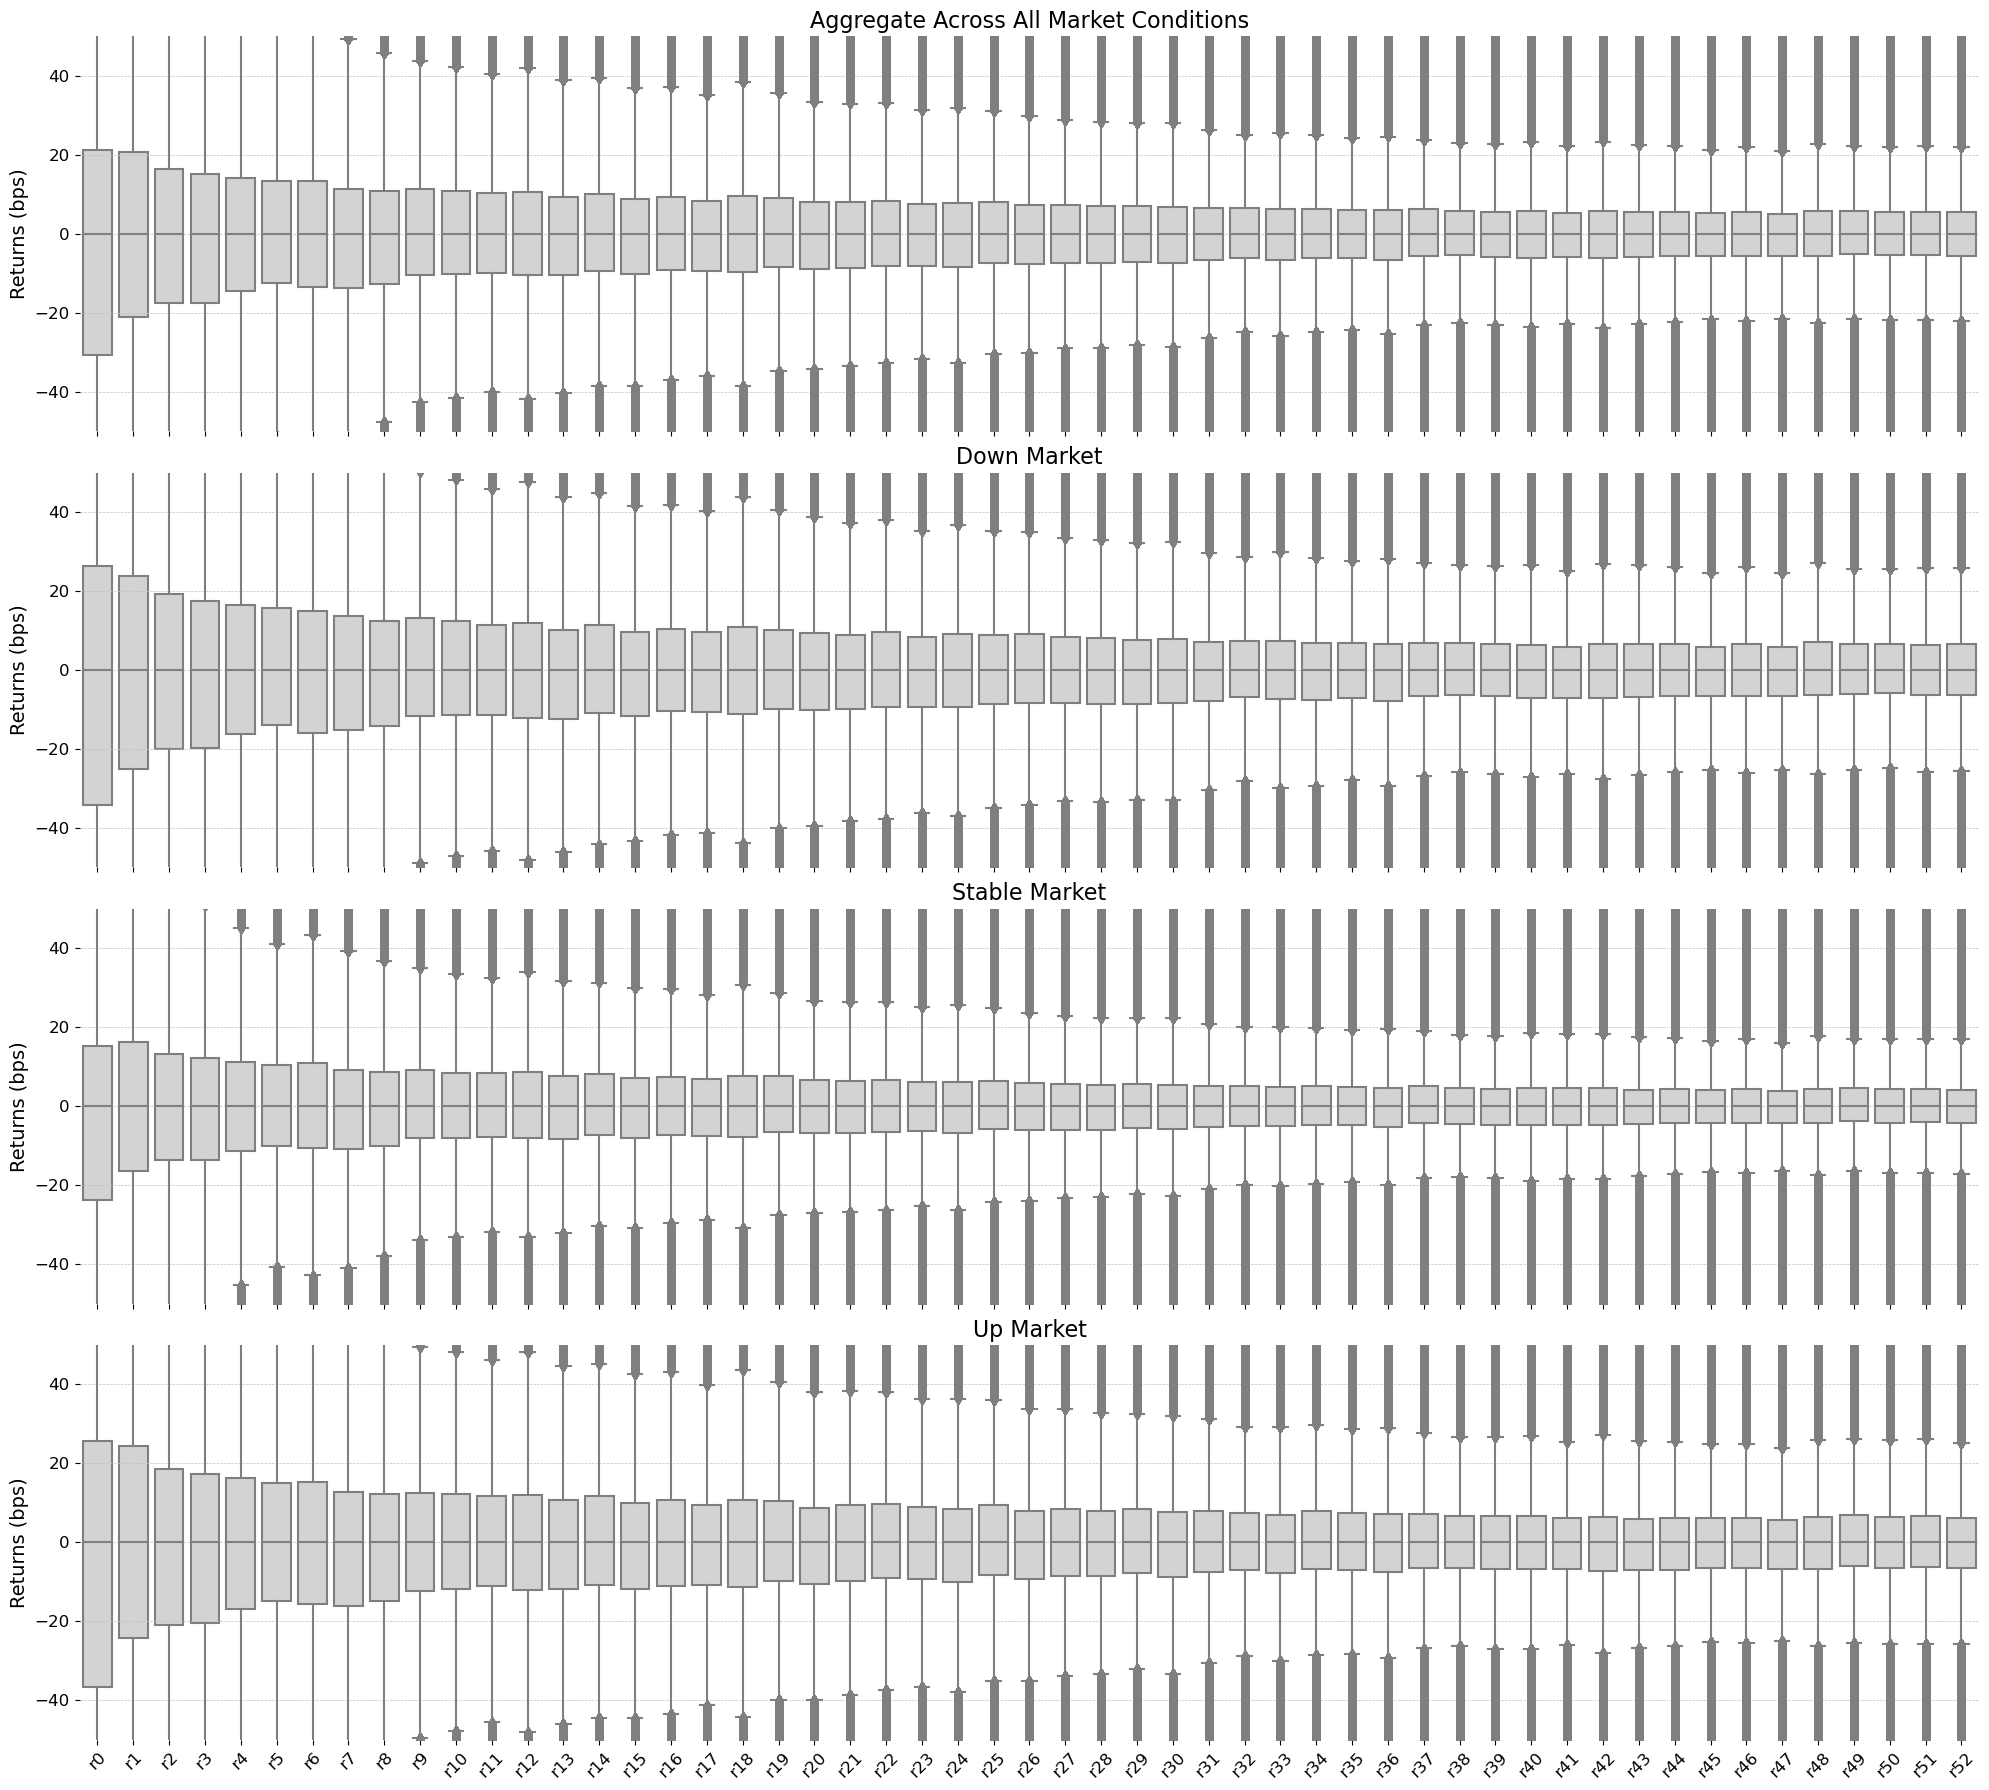

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure and axes for the 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(20, 18), sharex=True)

# Aggregate across all market conditions
sns.boxplot(data=train_data.iloc[:, 2:55], ax=axs[0], color='lightgray')
axs[0].set_title('Aggregate Across All Market Conditions', fontsize=16, fontweight='light')
axs[0].set_ylabel('Returns (bps)', fontsize=14)
axs[0].tick_params(axis='x', labelsize=12, rotation=45)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_ylim(-50, 50)
axs[0].grid(axis='y', linestyle='--', linewidth=0.5, color='silver')
# Correct way to remove the box frame
for spine in axs[0].spines.values():
    spine.set_visible(False)

# Specific market conditions
for i, (market_data, title) in enumerate(market_conditions, start=1):
    sns.boxplot(data=market_data.iloc[:, 2:55], ax=axs[i], color='lightgray')
    axs[i].set_title(title, fontsize=16, fontweight='light')
    axs[i].set_ylabel('Returns (bps)', fontsize=14)
    axs[i].tick_params(axis='x', labelsize=12, rotation=45)
    axs[i].tick_params(axis='y', labelsize=12)
    axs[i].set_ylim(-50, 50)
    axs[i].grid(axis='y', linestyle='--', linewidth=0.5, color='silver')
    # Correct way to remove the box frame for each subplot
    for spine in axs[i].spines.values():
        spine.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


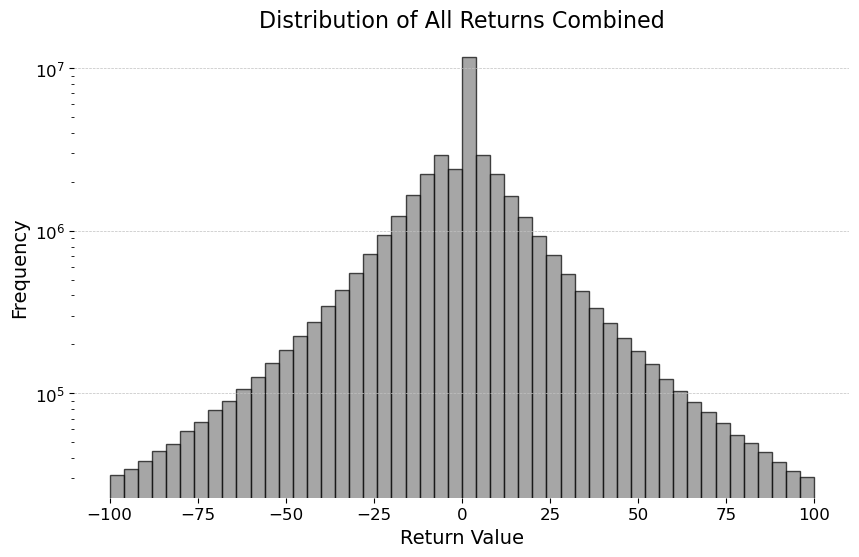

In [22]:
# Flatten the returns and plot their distribution
all_returns = train_data.iloc[:, 2:55].values.flatten()

plt.figure(figsize=(10, 6))
plt.hist(all_returns, bins=50, range=[-100, 100], color='gray', edgecolor='black', alpha=0.7)
plt.title('Distribution of All Returns Combined', fontsize=16, fontweight='light')
plt.xlabel('Return Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log')  # Set y-axis to log scale
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='silver')
plt.box(False)
plt.show()


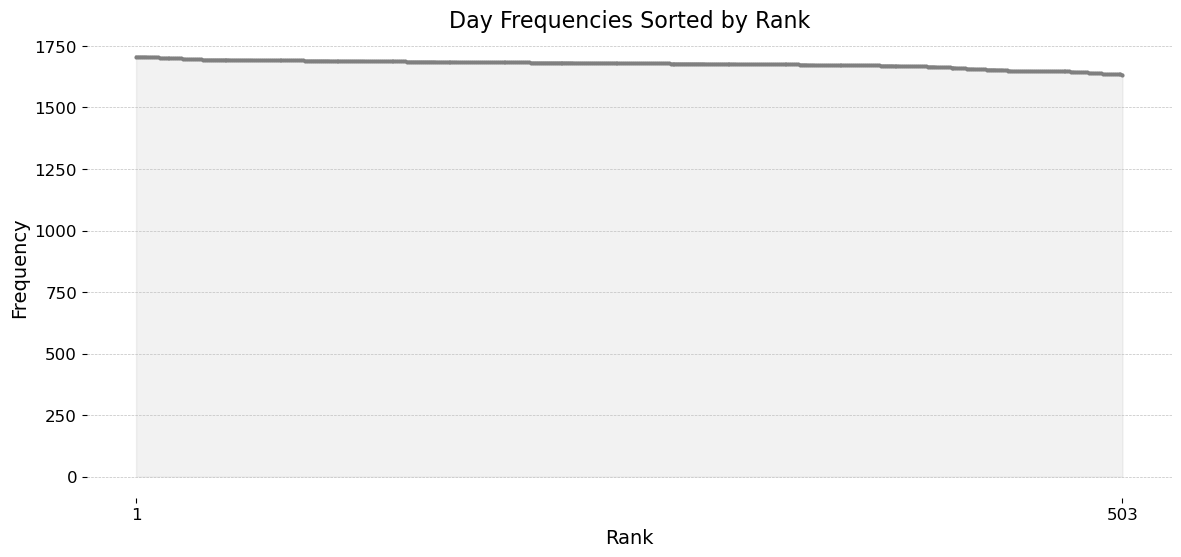

In [20]:
# Prepare data
day_frequencies = train_data['day'].value_counts().sort_values(ascending=False)
day_ranks = range(1, len(day_frequencies) + 1)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(day_ranks, day_frequencies, marker='o', linestyle='-', color='gray', markersize=2)  # Reduced marker size
plt.fill_between(day_ranks, day_frequencies, color="gray", alpha=0.1)
plt.title('Day Frequencies Sorted by Rank', fontsize=16, fontweight='light')
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks([1, max(day_ranks)], [1, max(day_ranks)], fontsize=12)  # Add ticks for the first and last rank
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='silver')
plt.box(False)
plt.show()


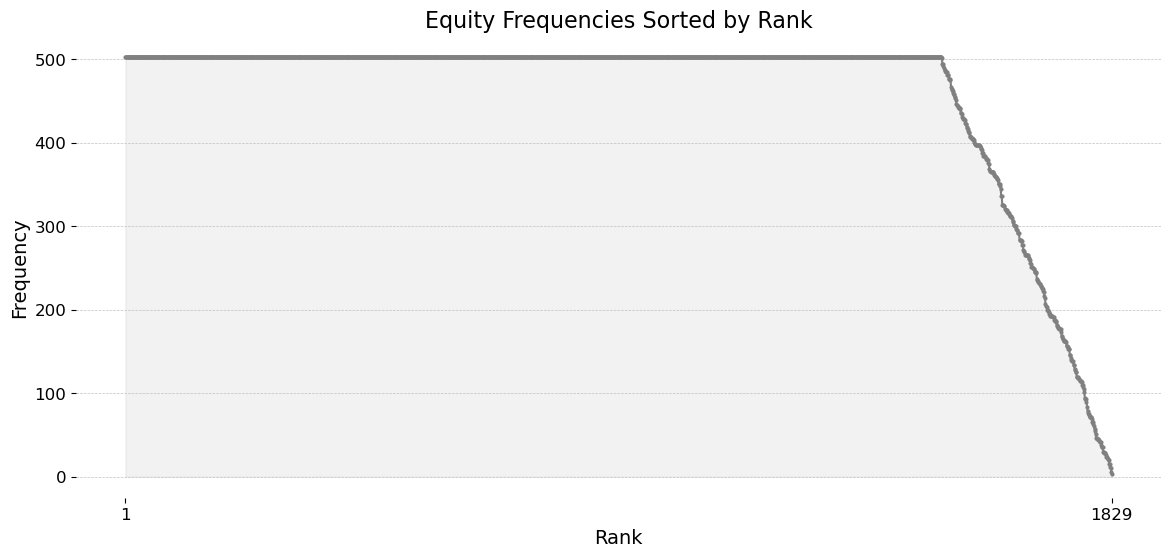

In [21]:
# Prepare data
equity_frequencies = train_data['equity'].value_counts().sort_values(ascending=False)
equity_ranks = range(1, len(equity_frequencies) + 1)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(equity_ranks, equity_frequencies, marker='o', linestyle='-', color='gray', markersize=2)  # Reduced marker size
plt.fill_between(equity_ranks, equity_frequencies, color="gray", alpha=0.1)
plt.title('Equity Frequencies Sorted by Rank', fontsize=16, fontweight='light')
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks([1, max(equity_ranks)], [1, max(equity_ranks)], fontsize=12)  # Add ticks for the first and last rank
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='silver')
plt.box(False)
plt.show()


In [44]:
# Merge the input and output data on the 'ID' column
merged_data = train_data.merge(train_data_y, left_index=True, right_index=True)
division_value = 100
columns_to_transform = [f'r{i}' for i in range(53)]
for column in columns_to_transform:
    merged_data[column] = merged_data[column] / division_value
merged_data[columns_to_transform] = np.tanh(merged_data[columns_to_transform])
# Replace NaN values with the mask value
mask_value = -2.0  # Use float explicitly
merged_data.fillna(mask_value, inplace=True)
# Drop the 'day' and 'equity' columns from the DataFrame
merged_data = merged_data.drop(['day', 'equity'], axis=1)

# Function to apply FFT and return magnitudes
def get_fft_magnitudes(row):
    fft_values = np.fft.fft(row)
    fft_magnitudes = np.abs(fft_values)
    return fft_magnitudes[:27]  # Taking half of the FFT values due to symmetry

# Apply FFT on the return series only (excluding the 'reod' column)
fft_magnitudes = merged_data.drop('reod', axis=1).apply(get_fft_magnitudes, axis=1, result_type='expand')
# Naming the frequency magnitude columns
fft_magnitudes.columns = [f'freq_{i}' for i in range(27)]
# Including the 'reod' column back into the new DataFrame
merged_data2 = pd.concat([fft_magnitudes, merged_data['reod']], axis=1)
# Prepare frequency domain features (ensure to exclude the target 'reod' column)
X_freq = merged_data2.drop('reod', axis=1).values

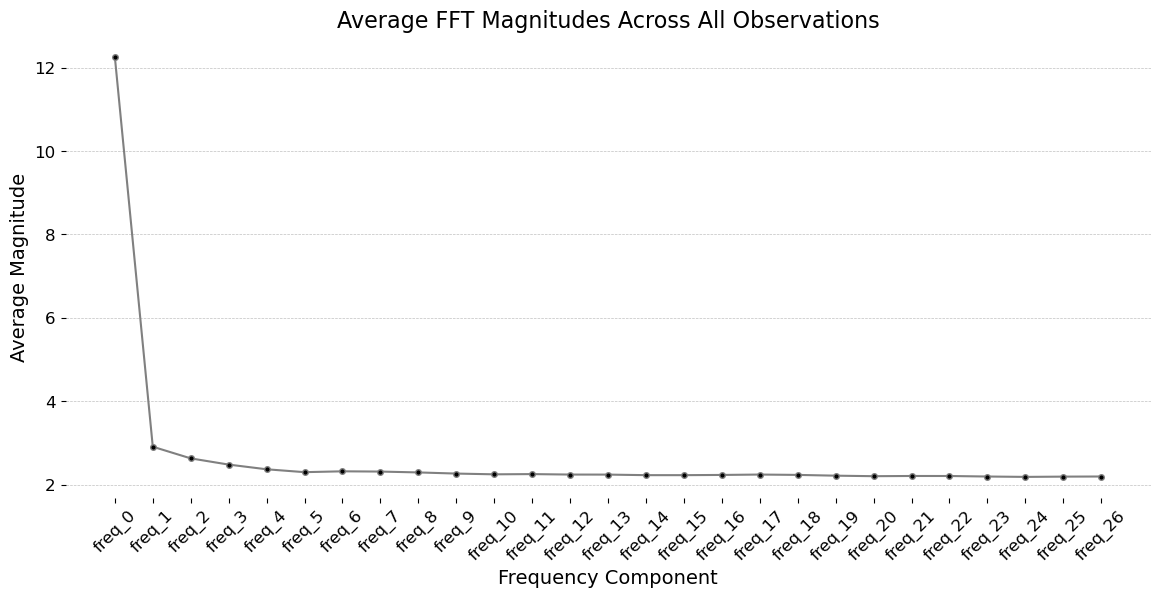

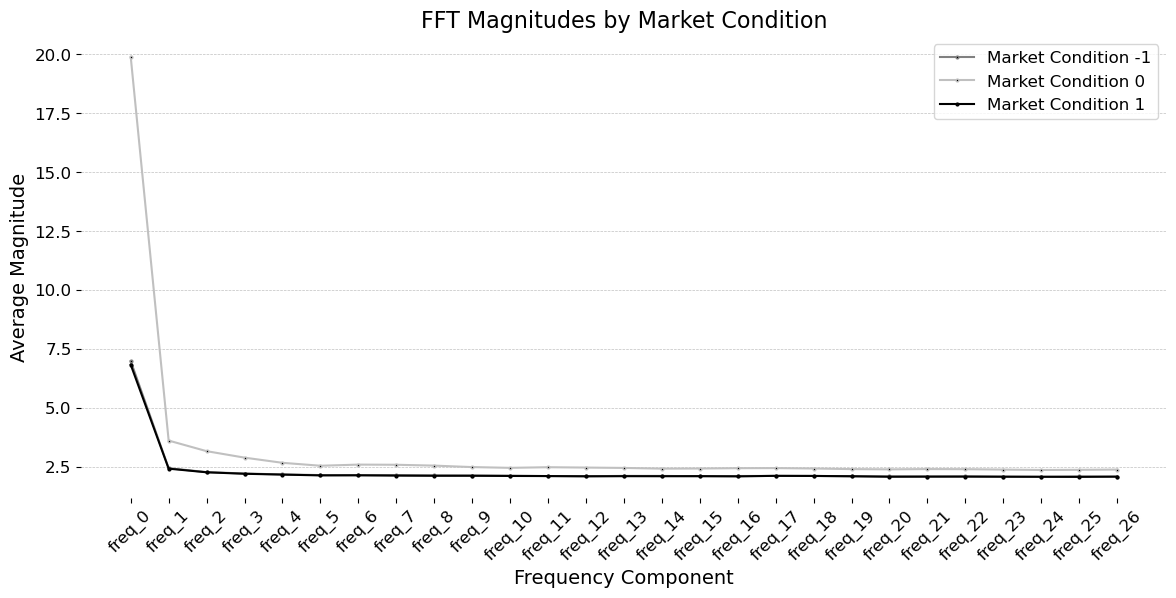

In [49]:
# Description:
# This cell performs a series of data transformations and Fourier analysis on the dataset of stock returns. 
# The process starts by merging input features with target output data based on their indices, ensuring 
# that each day's and equity's return series is aligned with its corresponding market condition. 
# The return values are first scaled down by a factor of 100 and then transformed using the hyperbolic 
# tangent function to normalize their range. NaN values, representing missing data points, are replaced 
# with a specified mask value to maintain consistency in the dataset's shape. 
# Subsequently, 'day' and 'equity' columns are dropped as they are not needed for the frequency domain analysis.
# The core of this analysis involves applying the Fast Fourier Transform (FFT) to each row (representing 
# transformed return series for each day and equity) to shift the data from the time domain to the frequency 
# domain. This transformation allows us to analyze the magnitude of different frequencies within the return 
# series. The FFT produces complex numbers, from which magnitudes are extracted to represent the strength 
# of each frequency component. Due to the symmetry in FFT outputs for real-valued inputs, only the first half 
# of the FFT values are retained. These magnitudes are then prepared for further analysis, with the final goal 
# of understanding the underlying frequency patterns in the stock return data and their relation to market conditions.

import matplotlib.pyplot as plt
import numpy as np

# Calculate the average FFT magnitude for each frequency component
avg_fft_magnitudes = fft_magnitudes.mean()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(avg_fft_magnitudes.index, avg_fft_magnitudes, marker='o', linestyle='-', color='gray', markersize=4, markerfacecolor='black')
plt.title('Average FFT Magnitudes Across All Observations', fontsize=16, fontweight='light')
plt.xlabel('Frequency Component', fontsize=14)
plt.ylabel('Average Magnitude', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='silver')
plt.box(False)
plt.show()

# Grouping the merged data by market condition
grouped = merged_data2.groupby('reod')

plt.figure(figsize=(14, 6))
colors = ['gray', 'silver', 'black']  # Grayscale shades for different market conditions
for (name, group), color in zip(grouped, colors):
    avg_magnitudes = group.drop('reod', axis=1).mean()
    plt.plot(avg_magnitudes.index, avg_magnitudes, label=f'Market Condition {name}', marker='o', linestyle='-', color=color, markersize=2, markerfacecolor='black')

plt.title('FFT Magnitudes by Market Condition', fontsize=16, fontweight='light')
plt.xlabel('Frequency Component', fontsize=14)
plt.ylabel('Average Magnitude', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='silver')
# Removing the box frame by hiding all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()
